In [ ]:
#ai consumer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df_original = pd.read_csv('household_power_consumption_new.csv')
df = df_original.copy()
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2017-01-01,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,2017-01-01,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,2017-01-01,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,2017-01-01,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,2017-01-01,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38154 entries, 0 to 38153
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  38154 non-null  int64  
 1   Date                   38154 non-null  object 
 2   Time                   38154 non-null  object 
 3   Global_active_power    38153 non-null  object 
 4   Global_reactive_power  38153 non-null  object 
 5   Voltage                38153 non-null  object 
 6   Global_intensity       38153 non-null  object 
 7   Sub_metering_1         38153 non-null  object 
 8   Sub_metering_2         38153 non-null  object 
 9   Sub_metering_3         38152 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


In [ ]:
df.shape

(38154, 10)

In [ ]:
df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df[['Global_active_power', 'Date_time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [ ]:
from sklearn.preprocessing import RobustScaler

# Fill na with values forward
print(f'Missing Value found: {df.isna().sum()}')
print('*'*100)
df = df.fillna(method='ffill')

# Transform data with RobustScaler
rs = RobustScaler()
num_cols = ['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']
df[num_cols] = rs.fit_transform(df[num_cols])

Missing Value found: Global_active_power    2
Date_time              0
Sub_metering_1         2
Sub_metering_2         2
Sub_metering_3         2
dtype: int64
****************************************************************************************************


In [ ]:
num_cols = ['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']
df[num_cols] = rs.fit_transform(df[num_cols])

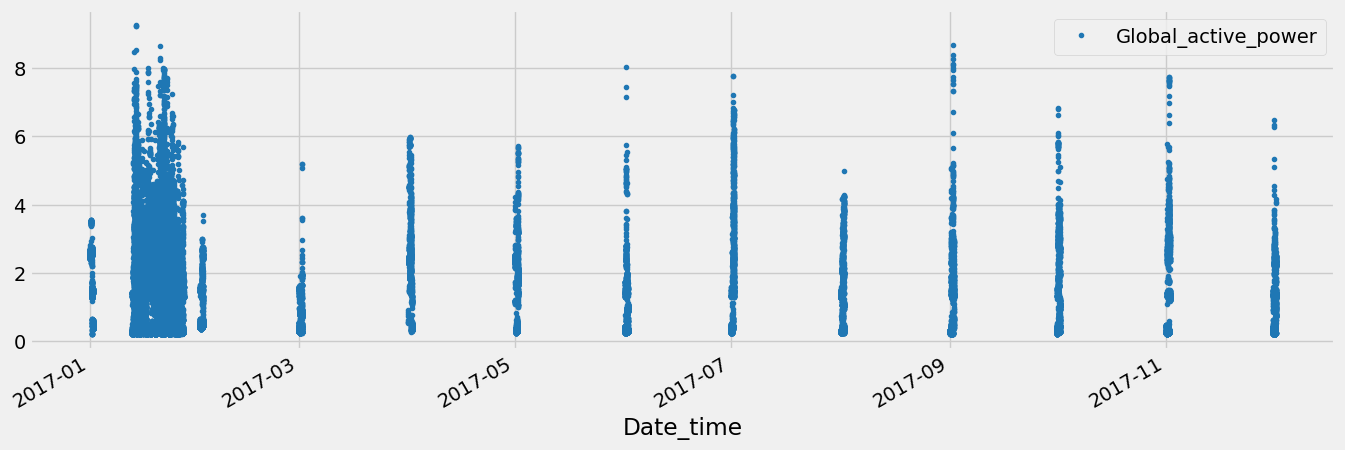

In [ ]:
df.plot(x='Date_time', y='Global_active_power',style='.',
        figsize=(15, 5),
        color=color_pal[0])
plt.show()

In [ ]:
# The data has periodic gaps, so we check for missing values
df.isna().sum()

Global_active_power    0
Date_time              0
Sub_metering_1         0
Sub_metering_2         0
Sub_metering_3         0
dtype: int64

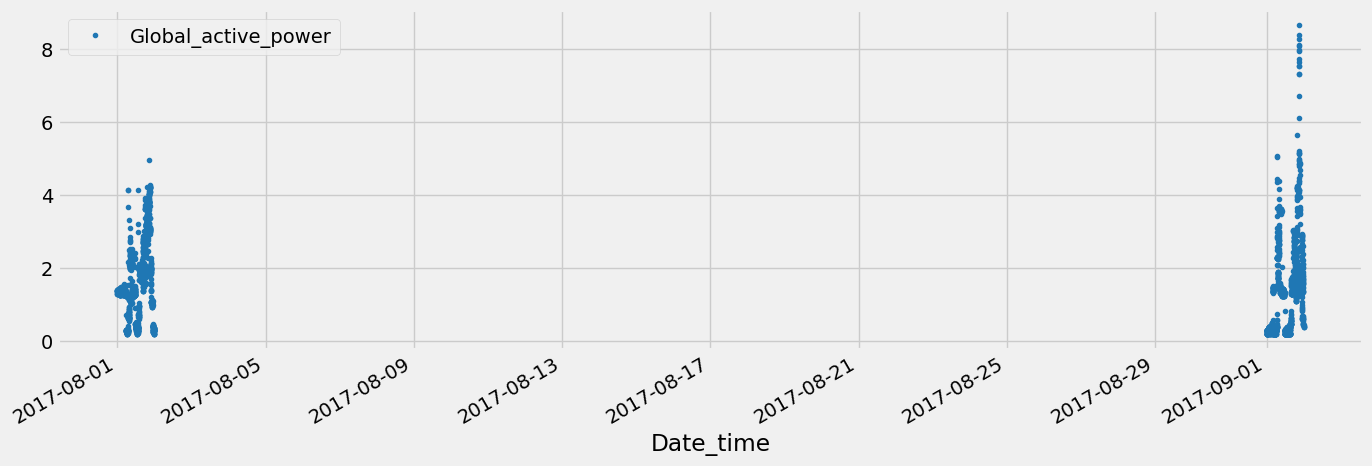

In [ ]:
# Investigate the gap with no values. In this example, I draw a sample in August.
no_val = df.loc[(df['Date_time'] >= '2017-08-01') & (df['Date_time'] < '2017-09-05')]

no_val.plot(x='Date_time', y='Global_active_power',style='.',
        figsize=(15, 5),
        color=color_pal[0])
plt.show()

In [ ]:
# Assign Date_time to index so it will be easier when using plots
df = df.set_index(df['Date_time'])
df.index = pd.to_datetime(df.index)
# Function Creating Features for time series analysis
def time_series_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month

    return df

df_ts = time_series_features(df)

# day 0 = Monday and replace 1 instead of 0 for more legible.
df_ts['day'] = df_ts['day']+1

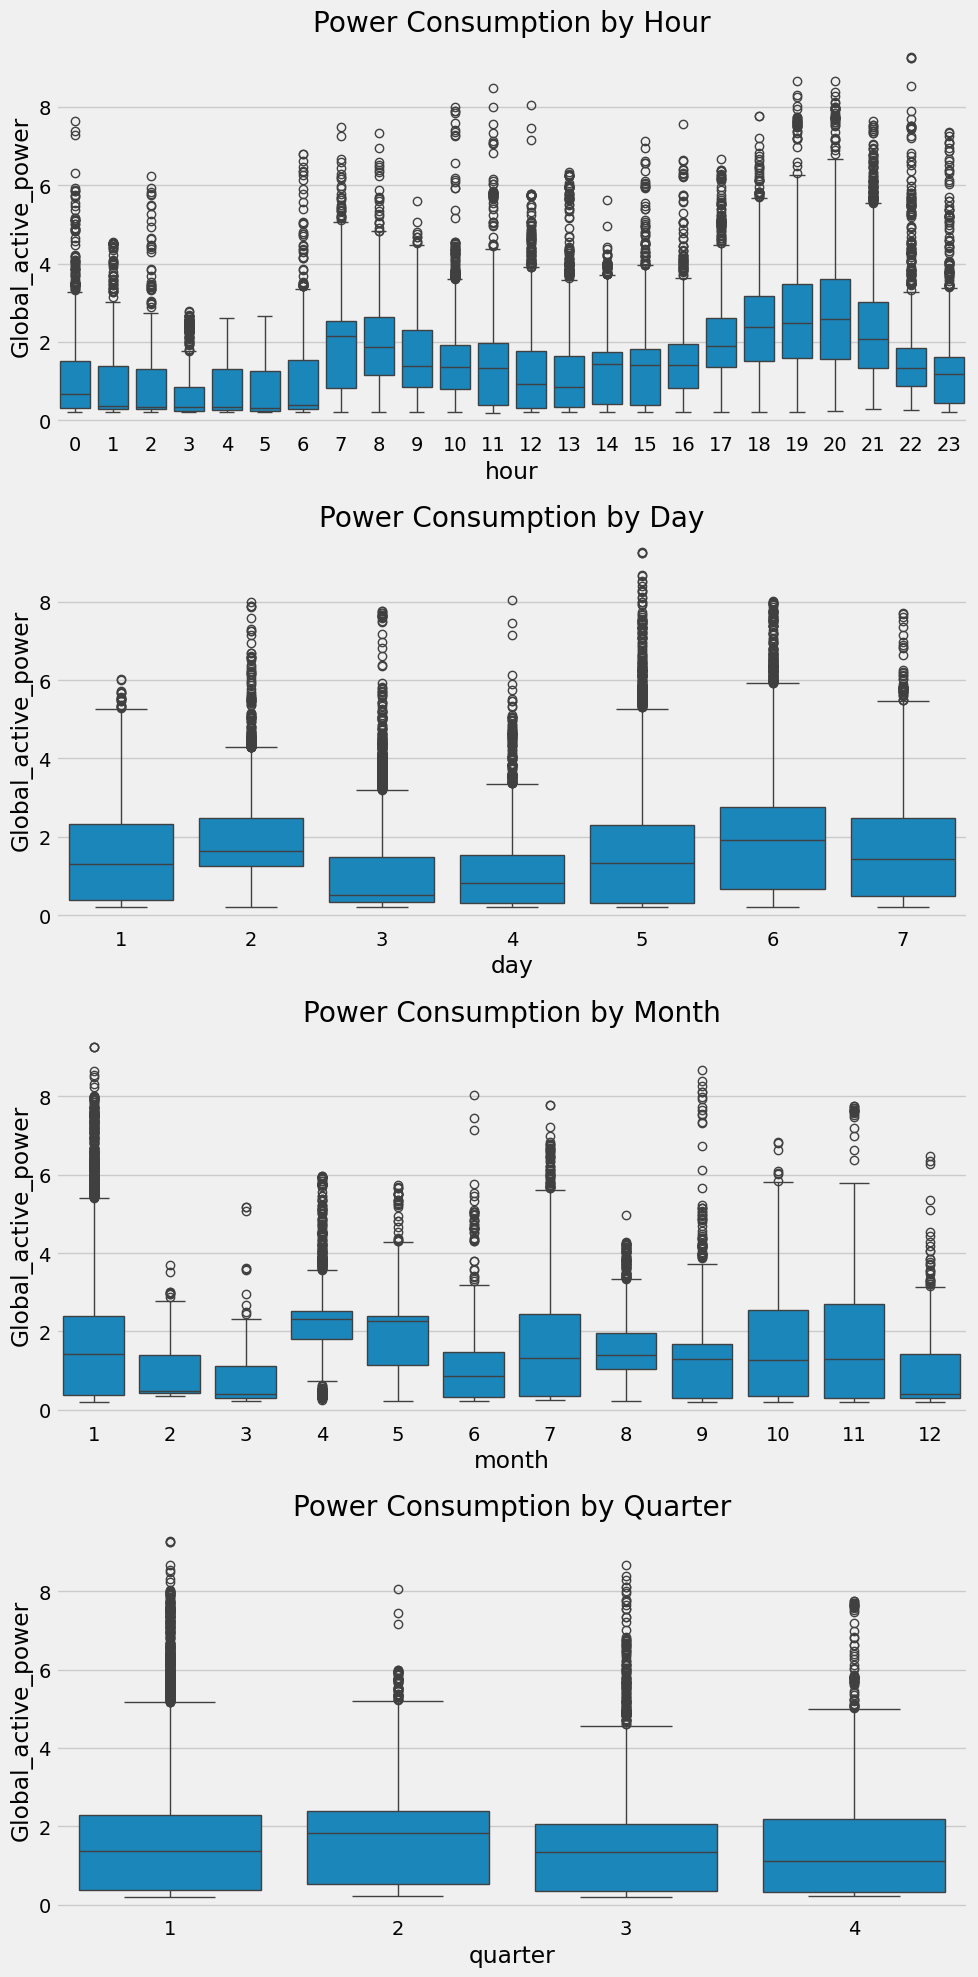

In [ ]:
# Visualize the power consumption in various timeframes.

fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Consumption by Hour
sns.boxplot(data=df_ts, x='hour', y='Global_active_power', ax=axs[0])
axs[0].set_title('Power Consumption by Hour')

# Consumption by Day
sns.boxplot(data=df_ts, x='day', y='Global_active_power', ax=axs[1])
axs[1].set_title('Power Consumption by Day')

# Consumption by Month
sns.boxplot(data=df_ts, x='month', y='Global_active_power', ax=axs[2])
axs[2].set_title('Power Consumption by Month')

# Consumption by Quarter
sns.boxplot(data=df_ts, x='quarter', y='Global_active_power', ax=axs[3])
axs[3].set_title('Power Consumption by Quarter')

plt.tight_layout()
plt.show()

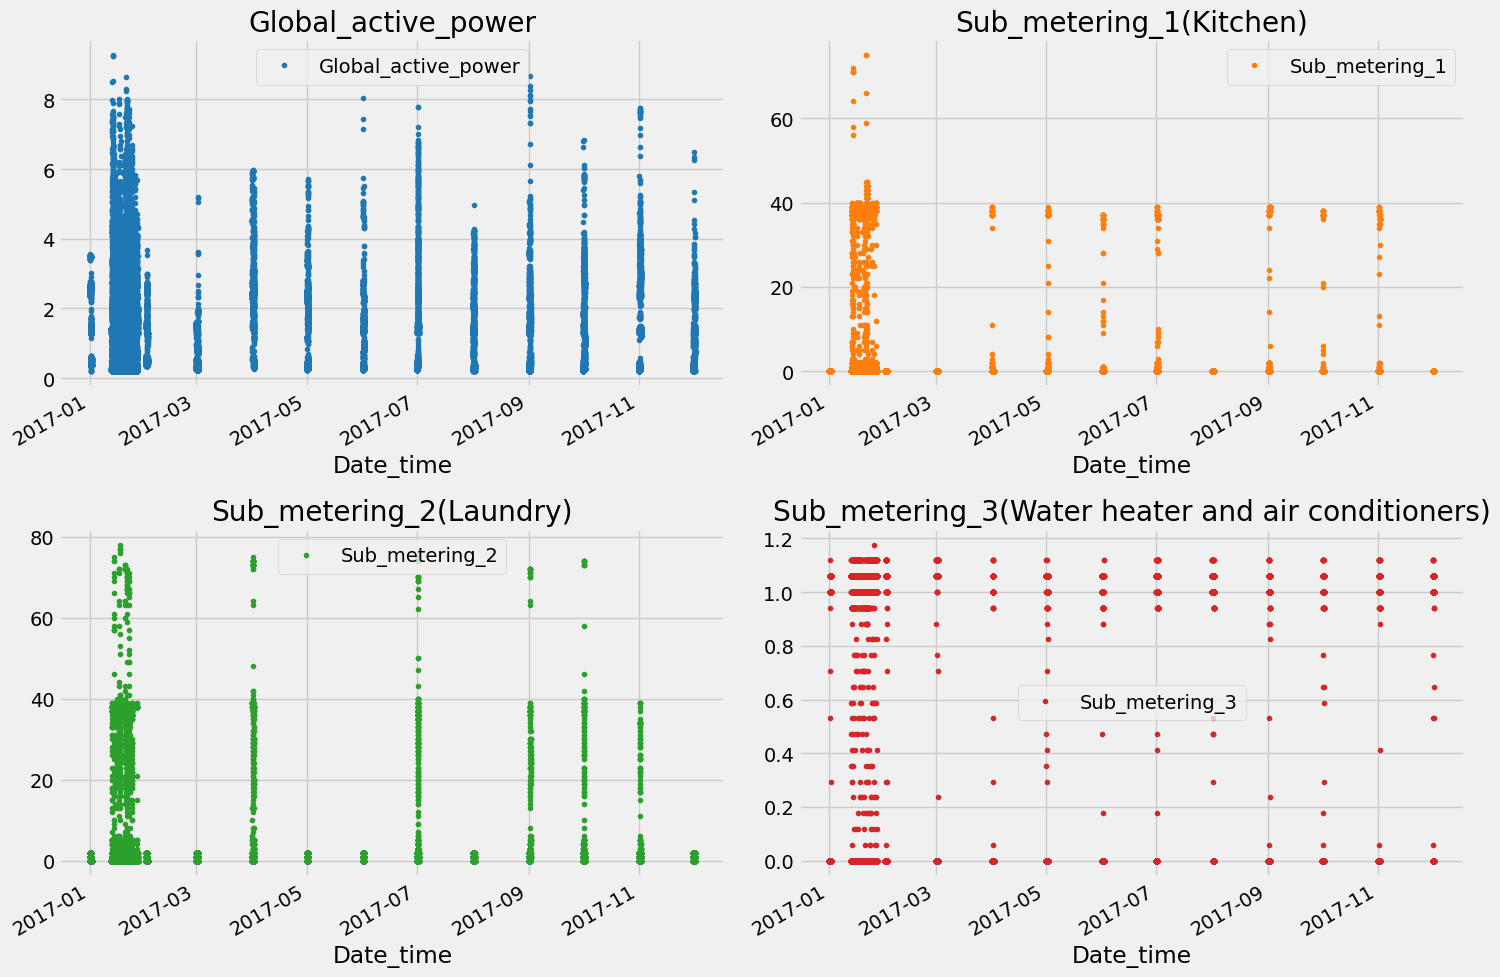

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

df.plot(x='Date_time', y='Global_active_power',style='.',color=color_pal[0], ax=axes[0,0], title='Global_active_power')
df.plot(x='Date_time', y='Sub_metering_1',style='.',color=color_pal[1], ax=axes[0,1], title='Sub_metering_1(Kitchen)')
df.plot(x='Date_time', y='Sub_metering_2',style='.',color=color_pal[2], ax=axes[1,0], title='Sub_metering_2(Laundry)')
df.plot(x='Date_time', y='Sub_metering_3',style='.',color=color_pal[3], ax=axes[1,1], title='Sub_metering_3(Water heater and air conditioners)')

plt.tight_layout()
plt.show()

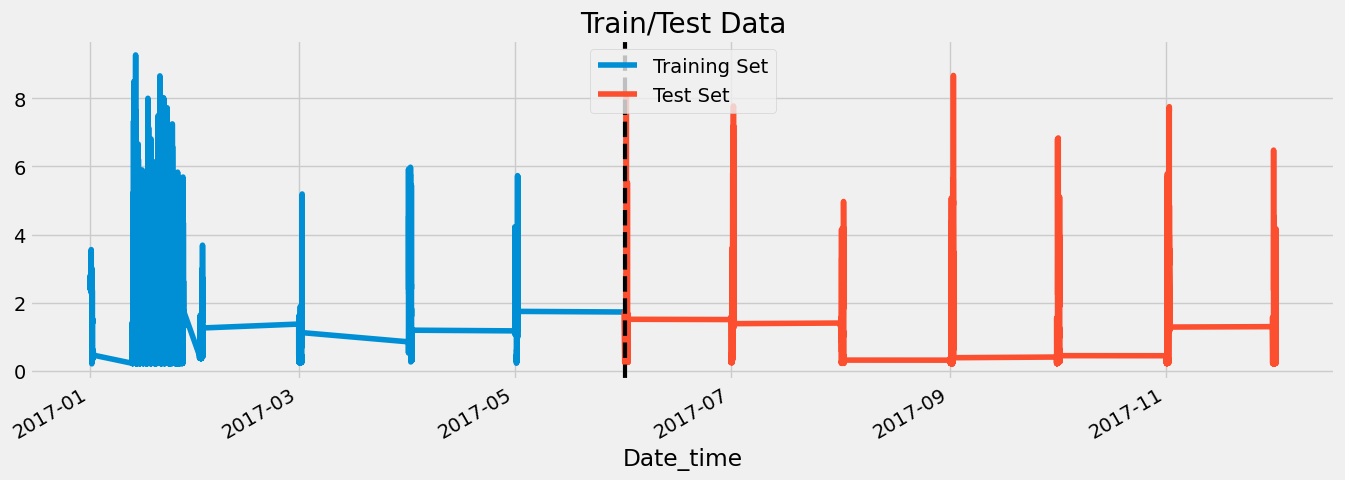

In [ ]:
# Split the data as of June because 1) there are many gaps from August to December so it would not help to see the performance of the models properly; 2) we can visualize the result in quarterly namely Q3 and Q4.
date_split = pd.to_datetime('2017-06-01')

train = df.loc[df.index <= date_split]
test = df.loc[df.index > date_split]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(x='Date_time', y='Global_active_power', ax=ax, label='Training Set', title='Train/Test Data')
test.plot(x='Date_time', y='Global_active_power', ax=ax, label='Test Set')
ax.axvline(date_split, color='black', ls='--', linewidth=3)
ax.legend(['Training Set', 'Test Set'])
plt.show()

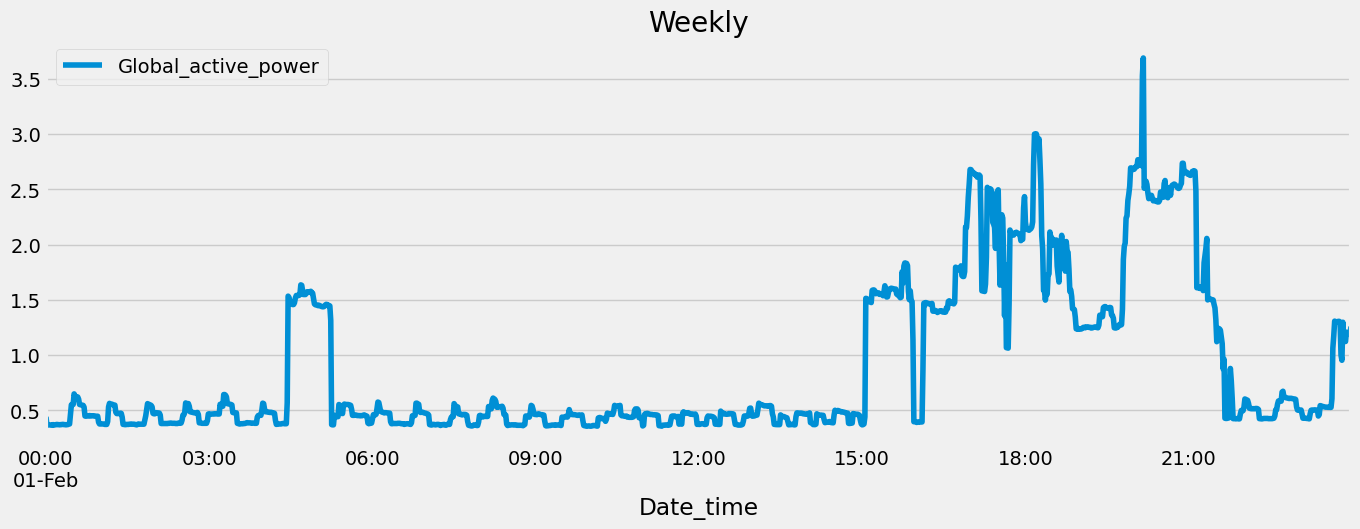

In [ ]:
# Observed data in a weekly timeframe which drew the sample in February
df.loc[(df.index >= '2017-02-01') & (df.index < '2017-02-08')].plot(x='Date_time', y='Global_active_power', figsize=(15, 5), title='Weekly')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train = time_series_features(train)
test = time_series_features(test)
features = ['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']
target = 'Global_active_power'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

y_pred_poly_val = poly_reg.predict(X_val)
rmse_poly_val = mean_squared_error(y_val, y_pred_poly_val, squared=False)
print(f'Validation RMSE for Polynomial Regression: {rmse_poly_val}')

y_pred_poly = poly_reg.predict(X_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print(f'Test RMSE for Polynomial Regression: {rmse_poly}')

Validation RMSE for Polynomial Regression: 0.8462600366353321
Test RMSE for Polynomial Regression: 0.6997605626352537


In [ ]:
import xgboost as xgb

xg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=3000,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.003,
                       random_state=42)

xg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=90, verbose=500)

y_pred_xgb = xg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'Test RMSE: {rmse}')

[0]	validation_0-rmse:1.68053
[500]	validation_0-rmse:0.91077
[1000]	validation_0-rmse:0.83985
[1500]	validation_0-rmse:0.83203
[2000]	validation_0-rmse:0.83042
[2500]	validation_0-rmse:0.82983
[2999]	validation_0-rmse:0.82956
Test RMSE: 0.6903314238042213


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf_val = rf.predict(X_val)
rmse_rf_val = mean_squared_error(y_val, y_pred_rf_val, squared=False)
print(f'Validation RMSE for Random Forest: {rmse_rf_val}')

y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Test RMSE for Random Forest: {rmse_rf}')

Validation RMSE for Random Forest: 0.8303392010702352
Test RMSE for Random Forest: 0.6967780879382337


In [ ]:
from sklearn.metrics import mean_absolute_error

metrics_dict = {'Model': [], 'RMSE': [], 'MSE': []}
models = [poly_reg, xg, rf]
model_names = ['Polynomial Regression', 'XGBoost', 'Random Forest']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics_dict['Model'].append(name)
    metrics_dict['RMSE'].append(rmse)
    metrics_dict['MSE'].append(mse)


metrics_df = pd.DataFrame(metrics_dict)
metrics_df.style.format({'RMSE': '{:.3f}', 'MSE': '{:.3f}'}).highlight_min(color='yellow', subset=['RMSE','MSE'])

,Model,RMSE,MSE
0,Polynomial Regression,0.700,0.490
1,XGBoost,0.695,0.482
2,Random Forest,0.697,0.485


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)  # use all available cores if you have a multi-core processor

grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Re-train the model using the best parameters
xg = xgb.XGBRegressor(**best_params)
xg.fit(X_train, y_train)

{'colsample_bytree': 1, 'max_depth': 5, 'subsample': 1}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Feature: Sub_metering_1, Score: 0.20614
Feature: Sub_metering_2, Score: 0.16180
Feature: Sub_metering_3, Score: 0.63205


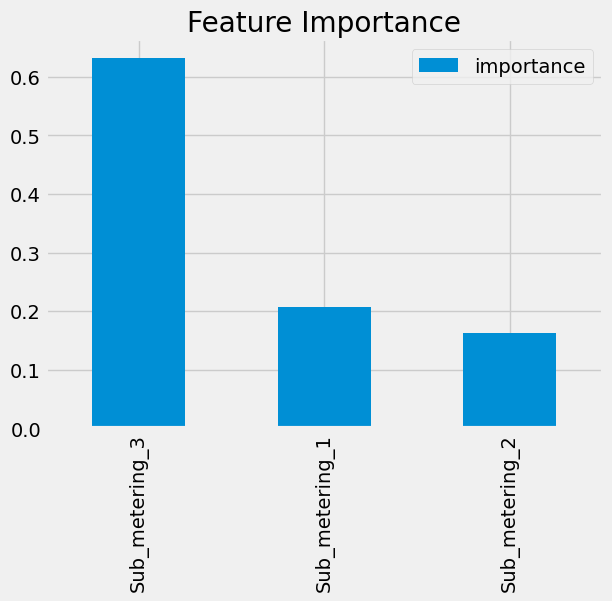

In [ ]:
# Result
importance = xg.feature_importances_
for i, j in enumerate(importance):
    print(f'Feature: {xg.feature_names_in_[i]}, Score: {j:.5f}')

# Plot
fi = pd.DataFrame(data=xg.feature_importances_,
             index=xg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance', ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

In [ ]:
# RMSE Score
test['Prediction'] = xg.predict(X_test)
score = mean_squared_error(test['Global_active_power'], test['Prediction'], squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')

RMSE Score on Test set: 0.695


In [ ]:
# Error
test['Error'] = np.abs(test[target] - test['Prediction'])
test['Date'] = test.index.date
test.groupby(['Date'])['Error'].mean().sort_values(ascending=False).head(10)

Date
2017-11-01    0.671305
2017-10-01    0.639291
2017-09-01    0.602554
2017-12-01    0.583502
2017-08-01    0.578015
2017-07-01    0.562272
2017-06-01    0.469649
Name: Error, dtype: float64